In [12]:
! pip3 install seaborn

    100% |████████████████████████████████| 215kB 8.6MB/s eta 0:00:01
    100% |████████████████████████████████| 28.4MB 1.8MB/s eta 0:00:01   13% |████▎                           | 3.8MB 9.1MB/s eta 0:00:03


In [1]:
import pandas as pd
import requests
import io
url="https://raw.githubusercontent.com/rhiever/Data-Analysis-and-Machine-Learning-Projects/master/example-data-science-notebook/iris-data.csv"
s=requests.get(url).content
###missing values represented by NA
data=pd.read_csv(io.StringIO(s.decode('utf-8')),na_values=["NA"])

In [2]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


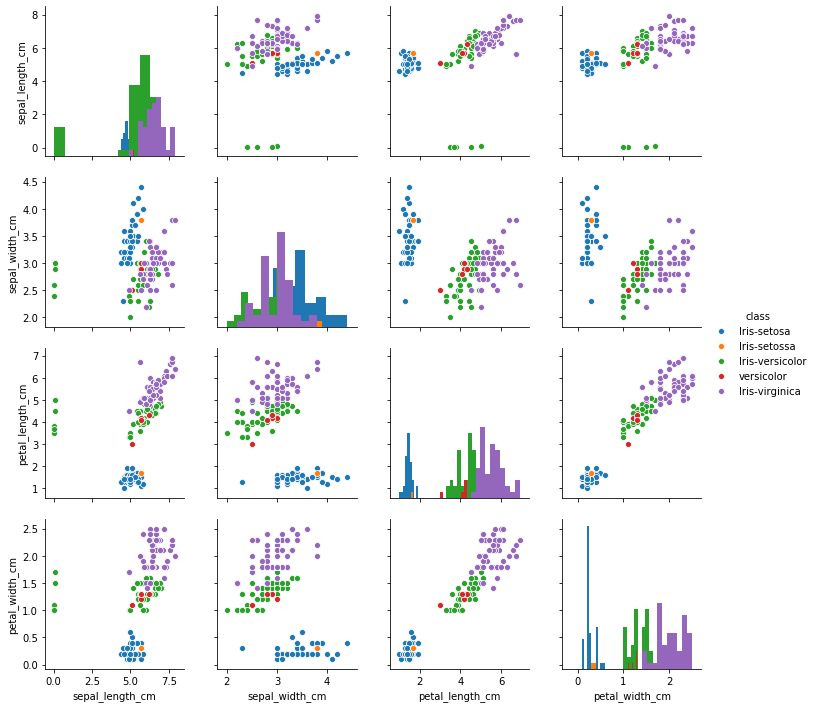

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.pairplot(data.dropna(),hue="class",diag_kind='hist')

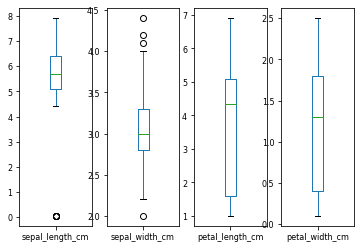

In [21]:
data.plot(kind='box', subplots=True, sharex=False, sharey=False, fontsize=8)
plt.show()

In [38]:
data.iloc[:,1:4]

,sepal_width_cm,petal_length_cm,petal_width_cm
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,2.3
147,3.0,5.2,2.0
148,3.4,5.4,2.3


In [40]:
data._get_numeric_data()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,2.3
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


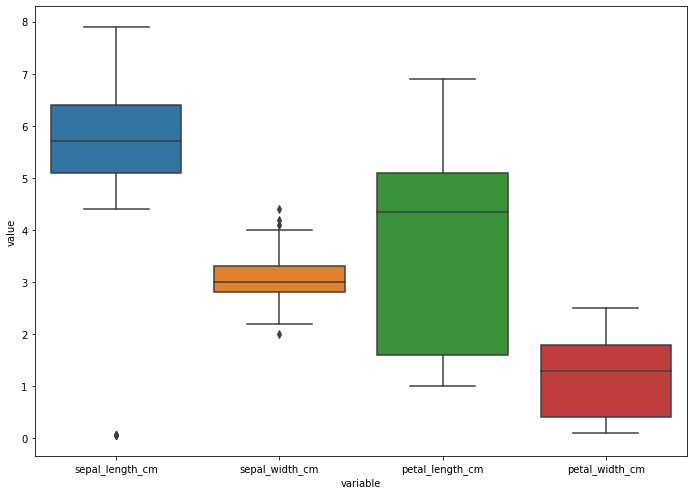

In [45]:

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x="variable", y="value", data=pd.melt(data._get_numeric_data()),ax=ax)
plt.show()

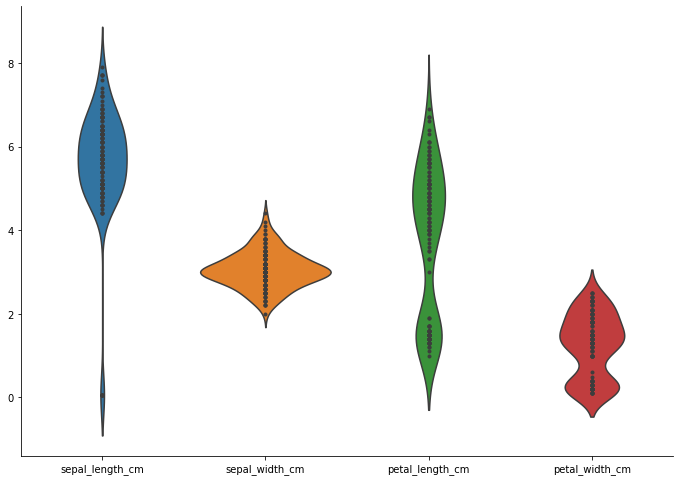

In [44]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.violinplot(data=data._get_numeric_data(), inner="points", ax=ax)    
sns.despine()

In [3]:
###Tidying the Data

In [7]:
data["class"].unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [11]:
data.loc[data["class"]=="versicolor","class"]="Iris-versicolor"
data.loc[data["class"]=='Iris-setossa',"class"]="Iris-setosa"
data["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

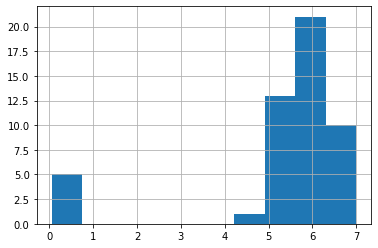

In [14]:
%matplotlib inline
data.loc[data["class"]=="Iris-versicolor","sepal_length_cm"].hist()

In [41]:
data=data.loc[(data["class"]!="Iris-setosa") | (data["sepal_width_cm"]>=2.5)]

In [42]:
data=data.loc[(data["class"]=="Iris-versicolor") | (data["sepal_width_cm"]>=2.5)]

In [65]:
data=data.dropna()

In [66]:
data.head()


,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
labels=data[data.columns[-1:]].values
all_data=data[data.columns[:4]].values


In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(all_data,labels,random_state=1,test_size=0.25)

In [113]:
models=[]
from sklearn.metrics import accuracy_score
scoring="accuracy"
num_folds=7
seed=7
models.append(("LR",LogisticRegression(solver="liblinear")))
models.append(("LDA",LinearDiscriminantAnalysis()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("SVM",SVC(gamma="auto")))
results=[]
names=[]
for name,model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_result=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_result)
    names.append(name)
    msg= "%s: %f (%f)" % (name,cv_result.mean(),cv_result.std())
    print (msg)

LR: 0.887500 (0.106019)
LDA: 0.934524 (0.050430)
KNN: 0.944048 (0.042367)
SVM: 0.935119 (0.035694)


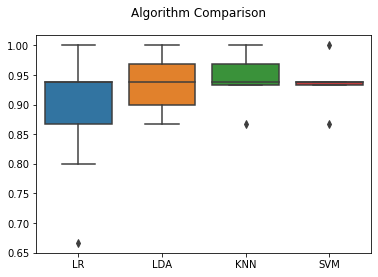

In [82]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
fig.suptitle('Algorithm Comparison') 

sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.show()

In [114]:
from sklearn.ensemble import VotingClassifier
ensemble1 = VotingClassifier(models)
results = cross_val_score(ensemble1, X_train, Y_train, cv=kfold)
print(results.mean())

0.9535714285714286


In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipelines=[]
results=[]
names=[]
pipelines.append(("scaled KNN",Pipeline([("scaler",StandardScaler()),("KNN",KNeighborsClassifier())])))
pipelines.append(("scaled LR",Pipeline([("scaler",StandardScaler()),("LR",LogisticRegression(solver="liblinear"))])))
pipelines.append(("scaled LDA",Pipeline([("scaler",StandardScaler()),("LDA",LinearDiscriminantAnalysis())])))
pipelines.append(("scaled SVM",Pipeline([("scaler",StandardScaler()),("SVM",SVC(gamma="auto"))])))

In [96]:
for name,model in pipelines:
    kfold=KFold(n_splits=num_folds,random_state=seed)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)
    

scaled KNN: 0.916071 (0.068081)
scaled LR: 0.860714 (0.096770)
scaled LDA: 0.934524 (0.050430)
scaled SVM: 0.916667 (0.067112)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

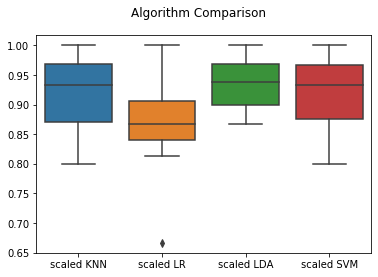

In [97]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax=plt.subplots()
fig.suptitle('Algorithm Comparison') 

sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.show()

In [108]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

ensembles = []
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier(n_estimators=100))) 

results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring) 
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


AB: 0.897619 (0.048889)
GBM: 0.880357 (0.039005)
RF: 0.916667 (0.046022)


In [112]:
from sklearn.ensemble import VotingClassifier
ensemble1 = VotingClassifier(ensembles)
results = cross_val_score(ensemble1, X_train, Y_train, cv=kfold)
print(results.mean())

0.8982142857142856
